In [16]:
import networkx as nx
import matplotlib.pyplot as plt

Minimalno bojenje grafa: {'A': 2, 'B': 3, 'C': 1, 'D': 2}
Broj korišćenih boja: 3


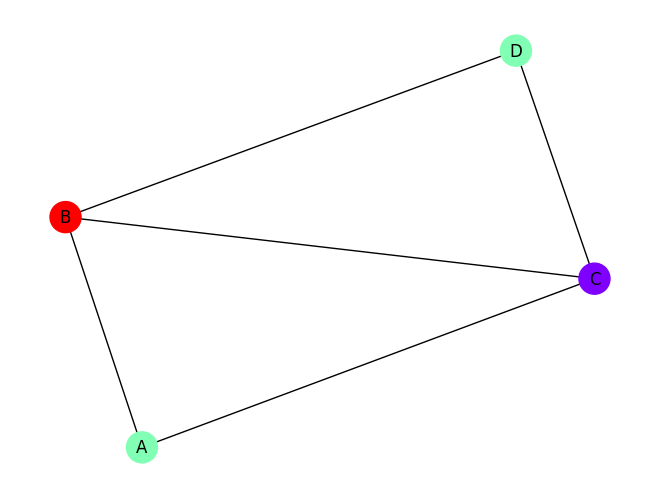

In [54]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, graph):
        self.graph = graph
        self.max_degree = max(d for _,d in G.degree())
        self.colors = self.initial_coloring()
        self.fitness = self.calc_fitness()

    # def is_feasible(self):
    #     for node in self.graph:
    #         for neighbor in self.graph[node]:
    #             if self.colors[node] == self.colors[neighbor]:
    #                 return False
    #     return True
        
        
    def initial_coloring(self):
        colors = {}
        # available_colors = set()
        # for node in self.graph:
        #     neighbor_colors = {colors[neighbor] for neighbor in self.graph[node] if neighbor in colors}
        #     color = 1
        #     while color in neighbor_colors:
        #         color += 1
        #     colors[node] = color
        #     available_colors.add(color)
       
        for node in self.graph:
            color = random.randint(1,self.max_degree + 1)
            colors[node] = color 
        return colors

    def calc_fitness(self):
        conflicts = 0 
        num_colors = max(self.colors.values())
        
        for node in self.graph:
            for neighbor in self.graph[node]:
                if self.colors[node] == self.colors[neighbor]:
                    conflicts += 1
    
        fitness = conflicts + (num_colors / self.max_degree) 
        return fitness

def is_feasible(individual):
        for node in individual.graph:
            for neighbor in individual.graph[node]:
                if individual.colors[node] == individual.colors[neighbor]:
                    return False
        return True

def crossover(parent1, parent2):
    child_colors = {}
    for node in parent1.colors:
        child_colors[node] = parent1.colors[node] if random.random() < 0.5 else parent2.colors[node]
    child = Individual(parent1.graph)
    child.colors = child_colors
    child.fitness = child.calc_fitness()
    return child

def mutation(individual):
    node = random.choice(list(individual.colors.keys()))
    neighbor_colors = {individual.colors[neighbor] for neighbor in individual.graph[node]}
    available_colors = set(range(1, len(individual.graph) + 1)) - neighbor_colors
    if available_colors:
        individual.colors[node] = random.choice(list(available_colors))
        individual.fitness = individual.calc_fitness()

def ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = [Individual(graph) for _ in range(population_size)]
    
    for _ in range(num_generations):
        population.sort(key=lambda x: x.fitness)
        # print(population[0].fitness)
        elites = population[:elitism_size]
        offspring = []
        
        for _ in range(population_size - elitism_size):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            if random.random() < mutation_prob:
                mutation(child)
            offspring.append(child)
        
        population = elites + offspring
    
    best_solution = min(population, key=lambda x: x.fitness)
    if is_feasible(best_solution):
        return best_solution, True
    else:
        return best_solution, False

def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda x: x.fitness)

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}
population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

G = nx.Graph(graph)
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)  # Pozicije čvorova
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()
else:
    print("Resenje nije nadjeno")

Minimalno bojenje grafa: {0: 10, 1: 4, 2: 12, 3: 12, 4: 6, 5: 6, 6: 1, 7: 12, 8: 12, 9: 10, 10: 1, 11: 10, 12: 10, 13: 9, 14: 9, 15: 11, 16: 13, 17: 3, 18: 2, 19: 3, 20: 10, 21: 2, 22: 7, 23: 3, 24: 12, 25: 7, 26: 8, 27: 4, 28: 6, 29: 13}
Broj korišćenih boja: 12


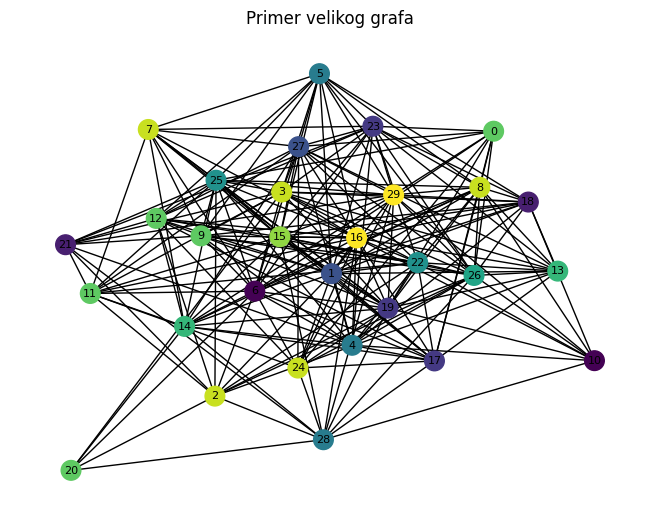

In [5]:
G = nx.erdos_renyi_graph(30,0.5)


population_size = 1000
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
else:
    print("Resenje nije nadjeno")

G = nx.Graph(G)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer velikog grafa")
plt.show()

In [13]:
G = nx.erdos_renyi_graph(550,0.5)

Minimalno bojenje grafa: {'A': 2, 'B': 3, 'C': 1, 'D': 2}
Broj korišćenih boja: 3


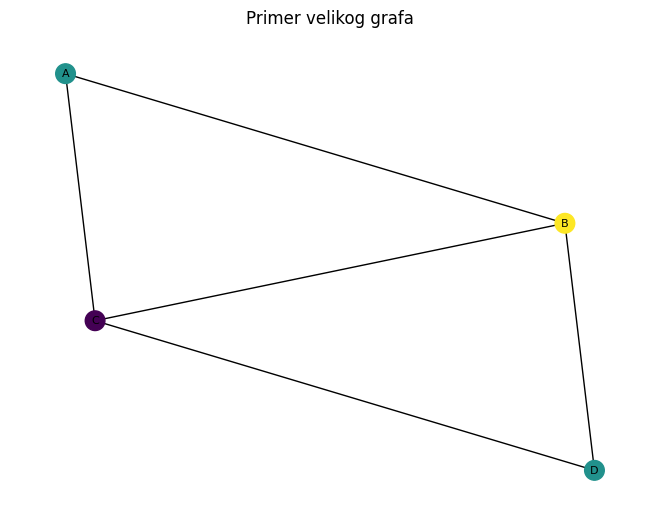

In [12]:
population_size = 30
num_generations = 30
tournament_size = 5
elitism_size = 5
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    # print("Broj korišćenih boja:", len(set(best_solution.colors.values())))




In [16]:
import time

Execution time: 16.60288977622986 seconds
Minimalno bojenje grafa: {0: 15, 1: 10, 2: 9, 3: 43, 4: 14, 5: 23, 6: 5, 7: 38, 8: 27, 9: 26, 10: 41, 11: 12, 12: 3, 13: 49, 14: 6, 15: 33, 16: 4, 17: 8, 18: 7, 19: 32, 20: 21, 21: 2, 22: 25, 23: 44, 24: 24, 25: 16, 26: 47, 27: 18, 28: 34, 29: 36, 30: 35, 31: 31, 32: 45, 33: 13, 34: 11, 35: 28, 36: 20, 37: 19, 38: 17, 39: 48, 40: 22, 41: 1, 42: 46, 43: 37, 44: 50, 45: 30, 46: 29, 47: 42, 48: 39, 49: 40}
Broj korišćenih boja: 50


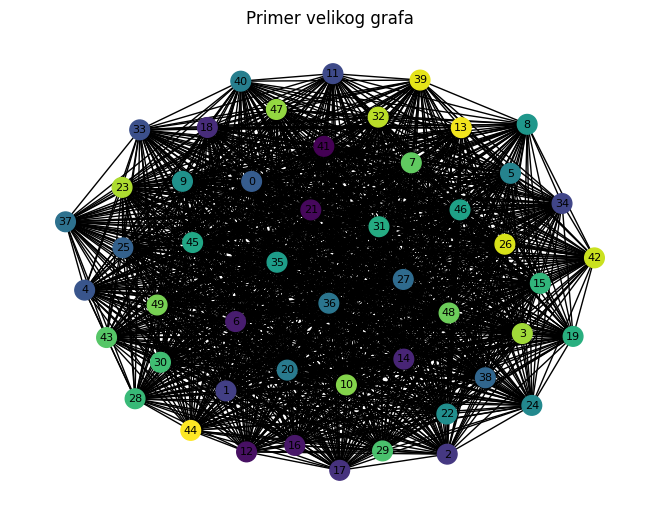

In [20]:
G = nx.complete_graph(50)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    # print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 3.261070489883423 seconds
Minimalno bojenje grafa: {'A': 4, 'B': 3, 'C': 2, 'D': 1}
Broj korišćenih boja: 4


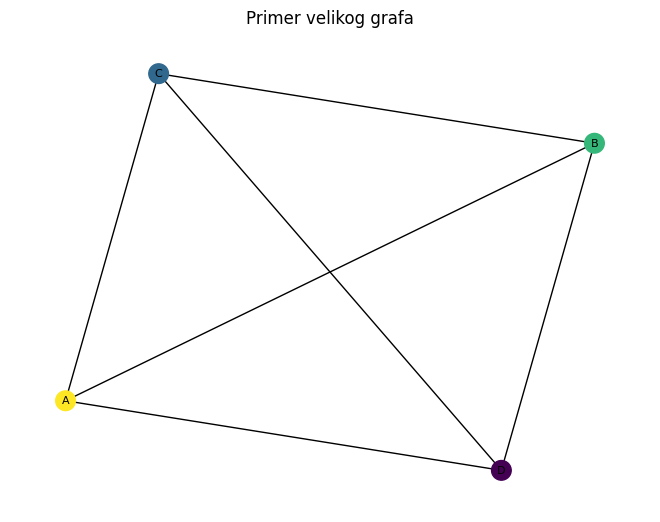

In [38]:
graph = {
    'A' : ['B','C','D'],
    'B' : ['A','C','D'],
    'C' : ['A','B'],
    'D' : ['A','B','C']
}
population_size = 1000
num_generations = 500
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

In [44]:
def read_dimacs(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node1, node2 = line.strip().split()
                node1, node2 = int(node1), int(node2)
                G.add_edge(node1, node2)
    return G

In [43]:
filename = 'test1'




G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 833.2097859382629 seconds
Resenje nije nadjeno
Broj korišćenih boja: 138


Execution time: 55.14906096458435 seconds
Minimalno bojenje grafa: {1: 1, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 1, 11: 1}
Broj korišćenih boja: 2


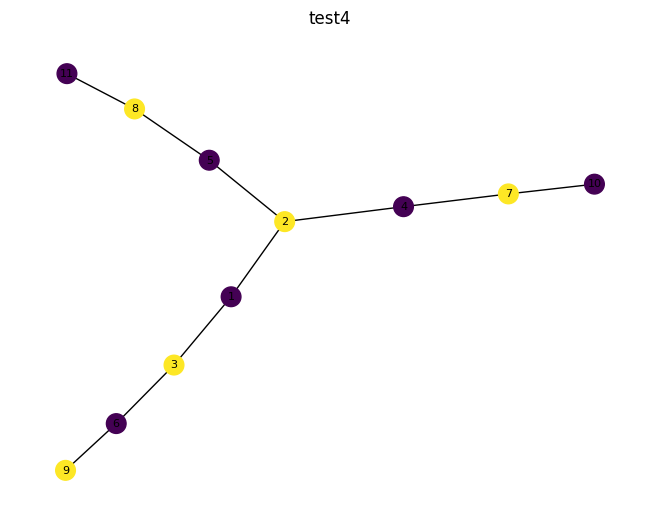

In [52]:
filename = "test4"
G = read_dimacs(filename)
population_size = 1000
num_generations = 500
tournament_size = 10
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title(filename)
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))